# PS.3 (triangular solver)

$Ly=b$ with $L$ lower triangular with $1$ in the diagonal.

\begin{align*}
y_1 &= b_1,\\
y_2 &= b_2-\ell_{2,1}y_1,\\
&\vdots \\
y_k & = b_k - \sum_{j=1}^{k-1}\ell_{k,j}y_j,  \\
&\vdots \\
y_n&=b_n-\sum_{j=1}^{n-1}\ell_{n,j}y_j.
\end{align*}

a) Write a solver for $Ly=b$.

In [11]:
function myL(L,b)
    
    n = length(b)
    y = copy(b) 
    
    for k = 2:n
        y[k] -= sum(L[k,j]*y[j] for j in 1:k-1)
    end
    
    return y
end

myL (generic function with 1 method)

$Ux=y$ with $U$ upper triangular and nonzero diagonal.

\begin{align*}
x_n &= \frac{y_n}{u_{n,n}}\\
x_{n-1} &= \frac{1}{u_{n-1,n-1}} \left(y_{n-1}-u_{n-1,n}x_{n}\right)\\
&\vdots\\
 x_{k}&=\frac{1}{u_{k,k}}\left(y_{k}-\sum_{j=k+1}^{n}u_{k,j}x_j\right) \\
 &\vdots\\
x_1&=\frac{1}{u_{1,1}}\left(y_1-\sum_{j=2}^{n}u_{1,j}x_j\right).
\end{align*}

b) Write a solver for $Ux=y$.

In [12]:
function myU(U,y)
    
    n = length(y)
    x = copy(y)
    
    for k in n:-1:1
        x[k] = 1/U[k,k] * (y[k]-sum(U[k,j]*x[j] for j in k+1:n; init = 0))
    end
    
    return x
end    

myU (generic function with 1 method)

# PS.3 (lu-decomposition without pivoting)

For $A\in \mathbb R^{n\times n}$, set $A^{(1)}:=B^{(1)}:=A$ and

$$
\ell^{(k)} = \frac{1}{a^{(k)}_{k,k}}\begin{pmatrix}
a^{(k)}_{k+1,k}\\
\vdots\\
a^{(k)}_{n,k}
\end{pmatrix}\in \mathbb R^{n-k}, \qquad\qquad
B^{(k+1)} = \check{B}^{(k)} - \ell^{(k)} \cdot \left(a^{(k)}_{k,k+1} , \cdots , a^{(k)}_{k,n}\right)\in \mathbb{R}^{(n-k)\times (n-k)},
$$
where $\check{B}^{(k)}$ equals $B^{(k)}$ without its first row and column.

$$
A^{(k+1)}= L_k A^{(k)} = \begin{pmatrix}
a^{(1)}_{1,1} & a^{1)}_{1,2} &\cdots &\cdots& a^{(1)}_{1,n}\\
0 & \ddots & \\
\vdots&\ddots & a^{(k)}_{k,k} & \cdots & a^{(k)}_{k,n}\\
0 &&0 \\
\vdots &&\vdots&B^{(k+1)}\\
0 &\cdots &0
\end{pmatrix},\qquad\qquad
L = 
\begin{pmatrix}
1& 0 &\cdots &\cdots&\cdots&0\\
|& \ddots&\ddots&&&\vdots \\
| & &\ddots&\ddots&&\vdots\\
|&&|&\ddots&0&\vdots\\
|&&|&&1&0\\
\ell^{(1)} & \cdots&\ell^{(k)}& \cdots & \ell^{(n-1)}&1
\end{pmatrix},\qquad U = A^{(n)}
$$

We may store $\ell^{(1)},\ldots,\ell^{(k)}$ in $A^{(k+1)}$ to get rid of $L$, i.e., 
\begin{equation}
\tilde{A}^{(k+1)}=  \begin{pmatrix}
a^{(1)}_{1,1} & a^{1)}_{1,2} &\cdots &\cdots& a^{(1)}_{1,n}\\
| & \ddots & \\
|&\ddots & a^{(k)}_{k,k} & \cdots & a^{(k)}_{k,n}\\
| &&| \\
| &&|&B^{(k+1)}\\
\ell^{(1)} &\cdots &\ell^{(k)}
\end{pmatrix}
\end{equation}

a) Write a function with input $A$ that returns L and U of the lu-decomposition.

b) Solve the system of linear equations $Ax=b$ for 

\begin{equation}
A = \begin{pmatrix} \varepsilon & 1\\
1 & 1
\end{pmatrix},\qquad b =\begin{pmatrix} 1 \\ 2\end{pmatrix}
\end{equation}

by using myLU and myU, myL for $\varepsilon=2$ and for $\varepsilon = 2^{-55}$. Are the results correct?

In [13]:
using LinearAlgebra

function myLU(A0)

    n = size(A0,1)
    A = copy(A0)
    
    for k in 1:n-1
        A[k+1:n,k] /= A[k,k]
        A[k+1:n,k+1:n] -= A[k+1:n,k]*transpose(A[k,k+1:n])
    end
    
    return tril(A,-1)+I, triu(A)
end

myLU (generic function with 1 method)

In [14]:
ε = 2 # 2^-55
A = [ε 1;1.0 1]
b = [1.0;2] 
L,U = myLU(A)

y = myL(L,b) 
x = myU(U,y)

2-element Vector{Float64}:
 -1.0
  3.0

# PS.3 (lu-decomposition with partial pivoting)

\begin{equation}
PA = LU,\qquad \qquad\qquad Ax=b \quad \Leftrightarrow \quad LUx=Pb
\end{equation}

a) Solve the system of linear equations $Ax=b$ for 

\begin{equation}
A = \begin{pmatrix} -2&2& -1\\
6 & -6 & 7\\
3&-8&4
\end{pmatrix},\qquad b =\begin{pmatrix} -1 \\ 7\\ -1\end{pmatrix}
\end{equation}

by using the lu-decomposition with partial pivoting by hand. 

b) The function myLUpivot is provided below. Write a function myLinearSolver that solves $Ax=b$ based on myLUpivot. Solve part a) with your implementation. Run testset and, if necessary, adjust the error bounds. 


## Solution

a) 
\begin{align*}
A^{(0)} & = \begin{pmatrix}
-2 & 2 & -1\\
6 & -6 & 7\\
3 & -8 & 4
\end{pmatrix}, & p^{(0)} & = \begin{pmatrix}
1\\2\\3
\end{pmatrix}
\\
A^{(1)}& = \begin{pmatrix}
6 & -6 & 7\\
-2 & 2 & -1\\
3 & -8 & 4
\end{pmatrix}, & p^{(1)} & = \begin{pmatrix}
2\\1\\3
\end{pmatrix} & 
\ell^{(1)} = \begin{pmatrix}
-\frac{1}{3}\\ \frac{1}{2}
\end{pmatrix}
\\
A^{(2)}& = \begin{pmatrix}
6 & -6 & 7\\
0 & 0 & \frac{4}{3}\\
0  & -5 & \frac{1}{2}
\end{pmatrix}, 
& p^{(2)} & = \begin{pmatrix}
2\\1\\3
\end{pmatrix}
\\
A^{(3)}& = \begin{pmatrix}
6 & -6 & 7\\
0  & -5 & \frac{1}{2}\\
0 & 0 & \frac{4}{3}
\end{pmatrix}, 
& p^{(2)} & = \begin{pmatrix}
2\\3\\1
\end{pmatrix}
\end{align*}

We obtain (note that we apply the permutation to $\ell^{(1)}$)
\begin{equation*}
L = 
\begin{pmatrix}
1&0&0\\
\frac{1}{2} & 1&0\\
-\frac{1}{3} & 0&1
\end{pmatrix},\qquad U = 
\begin{pmatrix}
6 & -6 & 7\\
0  & -5 & \frac{1}{2}\\
0 & 0 & \frac{4}{3}
\end{pmatrix}
\end{equation*}

The associated permutation matrix $P$ leads to $Pb = 
\begin{pmatrix}
7\\-1\\-1
\end{pmatrix}
$, 
so that $Ly=Pb$ is solved by 
$$
y=\begin{pmatrix}
7\\ -\frac{9}{2}\\ \frac{4}{3}
\end{pmatrix}.
$$

The equation $Ux=y$ is solved by 

$$
x = \begin{pmatrix}
1\\ 1\\ 1
\end{pmatrix}.
$$




In [15]:
function myLUpivot(A0)
    
    n = size(A0,1)
    p = [1:n;]
    A = copy(A0)
    
    for k in 1:n-1
        mptr = argmax(abs.(A[p[k:n],k]))
        p[k],p[k-1+mptr] = p[k-1+mptr],p[k]
        A[p[k+1:n],k] /= A[p[k],k]
        A[p[k+1:n],k+1:n] -= A[p[k+1:n],k]*transpose(A[p[k],k+1:n])
    end
    
    return tril(A[p,:],-1)+I, triu(A[p,:]), p
end

myLUpivot (generic function with 1 method)

In [16]:
function myLinearSolver(A,b)
    
    L,U,p = myLUpivot(A)
    y = myL(L,b[p]) 
    x = myU(U,y)
    return x 

end

myLinearSolver (generic function with 1 method)

In [17]:
A = [-2.0 2 -1;6 -6 7;3 -8 4]
b = [-1.0;7;-1]
myLinearSolver(A,b)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [18]:
L,U,p = myLUpivot(A)

([1.0 0.0 0.0; 0.5 1.0 0.0; -0.3333333333333333 -0.0 1.0], [6.0 -6.0 7.0; 0.0 -5.0 0.5; 0.0 0.0 1.333333333333333], [2, 3, 1])

In [11]:
using Test

@testset "myLU" begin     

    for n in 1:100
        A = randn(n,n)
        b = randn(n)
        L,U = myLU(A)
        y = myL(L,b) 
        x = myU(U,y)
        @test norm(L*U-A) < cond(A) *1e-10 
        @test norm(A*x-b)/norm(A) < cond(A) *1e-10 
        
        L,U,p = myLUpivot(A)
        x = myLinearSolver(A,b)
        @test norm(L*U-A[p,:]) < cond(A) *1e-10 
        @test norm(A*x-b)/norm(A) < cond(A) *1e-10 
    end

end

Test Summary: | Pass  Total  Time
myLU          |  400    400  0.4s


Test.DefaultTestSet("myLU", Any[], 400, false, false, true, 1.667503575657292e9, 1.667503576041301e9)

# PS.3 (Cholesky factorization)

For symmetric, positive definite $A=LL^\top$, the matrix $L=(l_{i,j})$ is given by 

\begin{align}
l_{j,j} & = \sqrt{a_{j,j}-\sum_{k=1}^{j-1} l_{j,k}^2},& j&=1,\ldots,n,  \\
l_{i,j} & = \frac{1}{l_{j,j}} \left(a_{i,j}-\sum_{k=1}^{j-1} l_{i,k}l_{j,k} \right),& i&=j+1,\ldots,n.
\end{align}

a) Write a function with input $A$ that returns $L$.

In [1]:
function myCholesky(A)
    
    n = size(A,1)
    L = zeros(n,n)
    
    for j in 1:n
        L[j,j] = sqrt(A[j,j]-sum(abs.(L[j,1:j-1]).^2))    
        
        for i in j+1:n
            L[i,j] = (A[i,j]-sum(L[i,1:j-1].*conj.(L[j,1:j-1])))/L[j,j]    
        end
    end
    
    return L
end

myCholesky (generic function with 1 method)

b) Complete the testset "myCholesky" and run the tests successfully.

In [9]:
using Test, LinearAlgebra

@testset "myCholesky" begin     

    for n in 1:20
        ℒ = rand(n,n)
        A = ℒ*ℒ'
        L = myCholesky(A)
        b = randn(n)
        y = L\b
        x = L'\y
        @test norm(L*L'-A)/norm(A) < cond(A)*1e-16
        @test norm(A*x-b) < cond(A)*1e-15
    end
end

Test Summary: | Pass  Total  Time
myCholesky    |   40     40  0.0s


Test.DefaultTestSet("myCholesky", Any[], 40, false, false, true, 1.667820986522692e9, 1.667820986523876e9)

# PS.3 (lls via normal equations)

Given data $\alpha,b\in\mathbb{R}^m$, consider 

\begin{equation*}
\arg\min_{x\in\mathbb{R}^2}\sum_{k=1}^m \left|b_k-(x_1+x_2\alpha_k) \right|^2
\end{equation*}

The minimizer $(x_1,x_2)$ defines an affine linear function $f(a)=x_1+x_2a$.

a) Write a julia function that takes input $\alpha, b$ and returns $f$. 

b) Generate several data sets with illustrative plots.


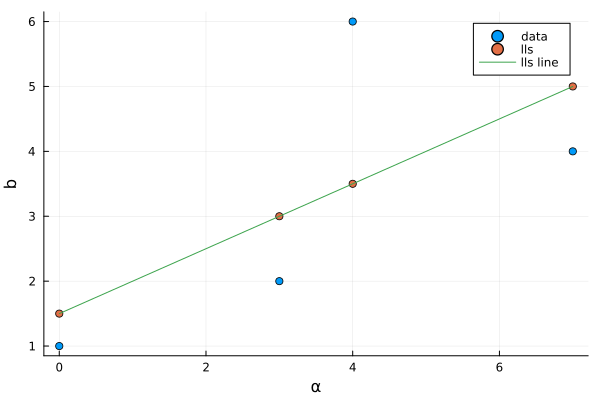

In [14]:
using LinearAlgebra

function myLLS(α,b)
    
    m = length(α)
    A = [ones(m) α]
    x = A'*A\A'*b
    return a->x[1]+x[2]*a 
end

α = [0;3;4;7]
b = [1;2;6;4]
f = myLLS(α,b)

using Plots
scatter(α,b,xlabel="α",ylabel="b",label="data")
scatter!(α,f.(α),label="lls")
plot!(f,label="lls line")

# PS.3 (svd)

For $m\geq n$, let $A\in\mathbb{R}^{m\times n}$ with $rank(A)=p$. 

- The matrix $A^\top A\in\mathbb{R}^{n\times n}$ has eigenvalues $\lambda_1\geq \ldots\geq \lambda_p>0$ with pairwise orthonormal eigenvectors $v_1,\ldots,v_p\in\mathbb{R}^n$ that are collected into

\begin{equation*}
V:=(v_1,\ldots,v_p)\in\mathbb{R}^{n\times p}.
\end{equation*}


- The singular values $\sigma_k:=\sqrt{\lambda_k}$, for $k=1,\ldots,p$, are collected into

\begin{equation*}
 \Sigma:=diag(\sigma_1,\ldots,\sigma_p)\in\mathbb{R}^{p\times p}.
\end{equation*}

- Define $u_k : = \frac{1}{\sigma_k} A v_k$, for $k=1,\ldots,p$, and build

\begin{equation*}
U:=(u_1,\ldots,u_p)\in\mathbb{R}^{m\times p}.
\end{equation*}


Then we obtain the decomposition

\begin{equation*}
A = U\Sigma V^\top.
\end{equation*}

The pseudo inverse of $A$ is $A^\# = V\Sigma^{-1}U^\top$. 

a) Write a julia function that takes input $A$ and returns $U$, $\sigma_1,\ldots,\sigma_p$, and $V$. 

b) Write a julia function that takes input $A$ and returns $A^\#$. Eventually use $A^\#$ to compute $f$ in part a) of PS.3 (lls via normal equations).

In [15]:
# ?eigen
# ?sortperm
# ?findall
function mySVD(A)
    
    F = eigen(A'*A)
    perm = sortperm(F.values;rev = true)
    λ = F.values[perm]
    V = F.vectors[:,perm]
    
    p = length(findall(λ.>0))
    σ = sqrt.(λ[1:p])
    m = size(A,1)
    U = zeros(m,p)
    
    for k in 1:p
        U[:,k] = 1/σ[k] * A*V[:,k]
    end
    
    return U,σ,V[:,1:p]
end

function myPinv(A)
    U,σ,V = mySVD(A)
    return V*Diagonal(1 ./σ)*U'
end

myPinv (generic function with 1 method)

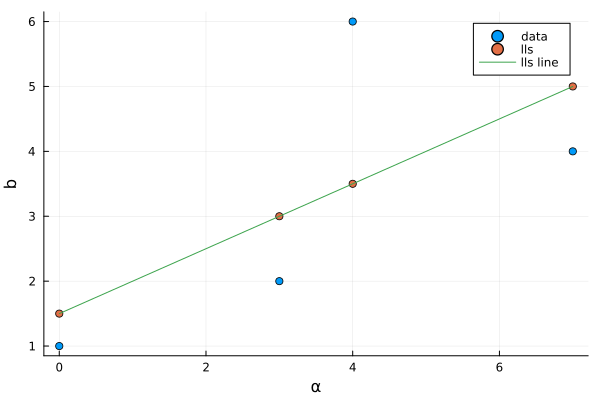

In [16]:
α = [0;3;4;7]
b = [1;2;6;4]

m = length(α)
A = [ones(m) α]

x = myPinv(A)*b
f = t->x[1]+x[2]*t

using Plots
scatter(α,b,xlabel="α",ylabel="b",label="data")
scatter!(α,f.(α),label="lls")
plot!(f,label="lls line")